In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten


In [4]:
with tf.device('/GPU:0'):
  (X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
import matplotlib.pyplot as plt


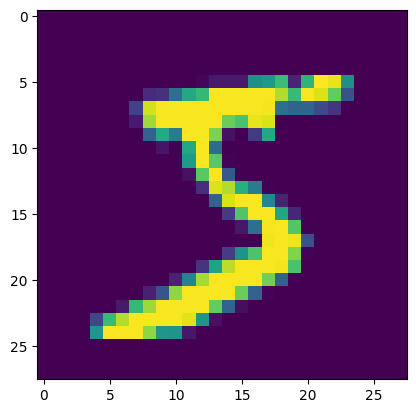

In [7]:
plt.imshow(X_train[0])

In [8]:
X_train=X_train/255
X_test=X_test/255

In [9]:
model=Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))#first hidden layer ->128 nodes
model.add(Dense(32,activation='relu'))  #second hidden layer -> 32  nodes
model.add(Dense(10,activation='softmax')) #output layer -> 10 nodes -> 10 classification category

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [22]:
with tf.device('/GPU:0'):
 history= model.fit(X_train,y_train,epochs=20,validation_split=0.2)

Epoch 1/20
1500/1500 [==============================] - 6s 3ms/step - loss: 0.0105 - accuracy: 0.9964 - val_loss: 0.1307 - val_accuracy: 0.9776
Epoch 2/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0068 - accuracy: 0.9980 - val_loss: 0.1527 - val_accuracy: 0.9747
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0085 - accuracy: 0.9973 - val_loss: 0.1447 - val_accuracy: 0.9767
Epoch 4/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0070 - accuracy: 0.9979 - val_loss: 0.1713 - val_accuracy: 0.9719
Epoch 5/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0092 - accuracy: 0.9971 - val_loss: 0.1388 - val_accuracy: 0.9781
Epoch 6/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0084 - accuracy: 0.9974 - val_loss: 0.1713 - val_accuracy: 0.9747
Epoch 7/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0066 - accuracy: 0.9977 - val_loss: 0.1698 - val_accuracy:

In [23]:
with tf.device('/GPU:0'):
  y_prob=model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [24]:
y_pred = y_prob.argmax(axis=1)

In [25]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
accuracy_score(y_test,y_pred)

0.9773

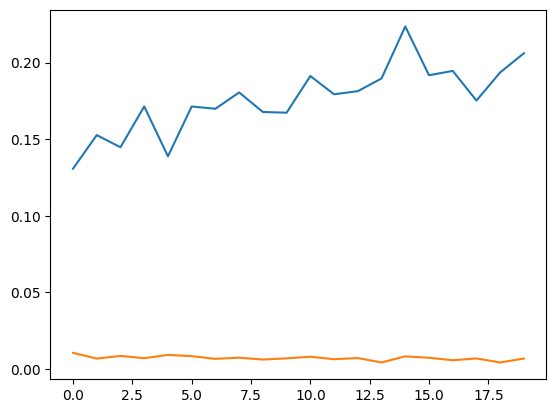

In [28]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])

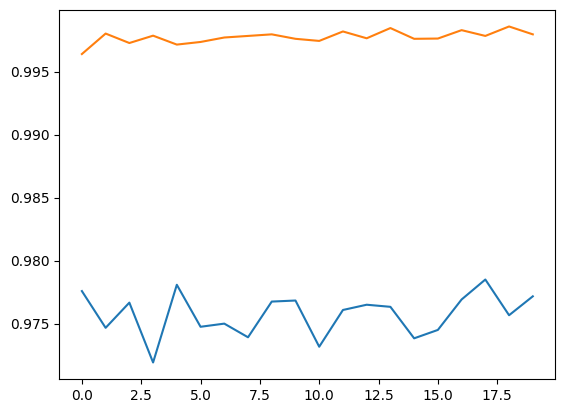

In [29]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])

In [35]:
y_random_pre=model.predict(X_test[0].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 166ms/step


In [36]:
y_random_pre

array([7])

In [37]:
y_test[0]

7